In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Pre-Processing of the data

In [5]:
# 1. Missing Data 

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# 2. Encoding 

# Not required as all the features are already int/float. 

In [9]:
# 3. Outliers. 

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Nothing to be done....all looks fine. If we see the max value of each ... it is within the range. 

In [10]:
# 4. Imbalance Data

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
268*2
# Data is not imbalanced. It is balanced. 

536

In [12]:
# 5. Feature scaling.

#  nothing to be done as of now. We can see how the accuracy of model comes. If it is low, we can see about this. 

#### Pre-Processing Done.

# Exploratory Data Analysis

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:ylabel='Outcome'>

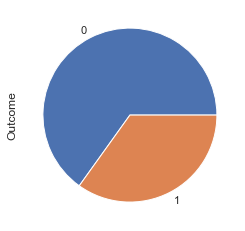

In [16]:
df['Outcome'].value_counts().plot(kind='pie')

In [23]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

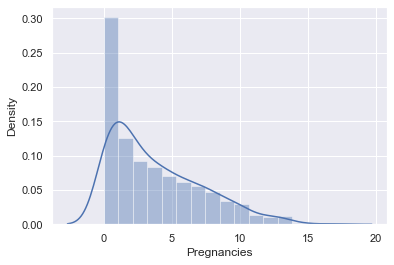

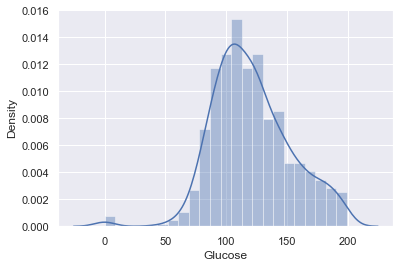

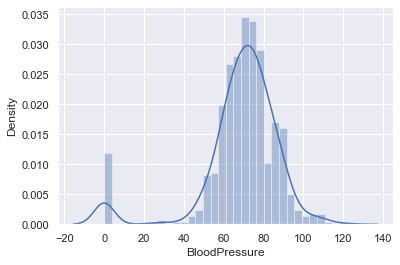

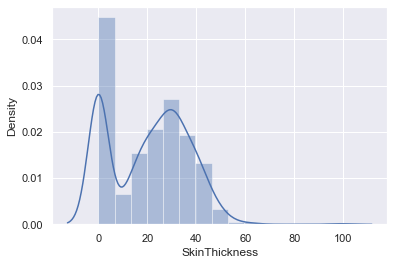

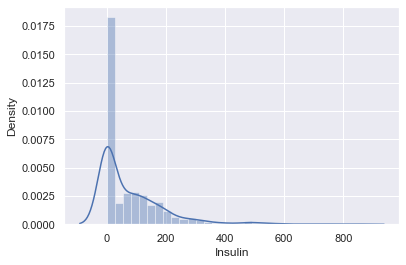

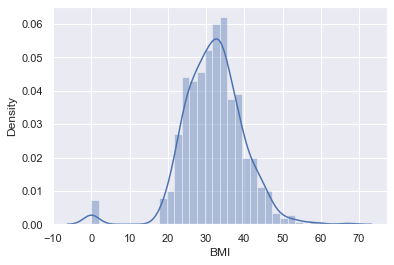

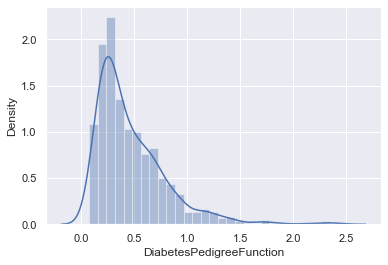

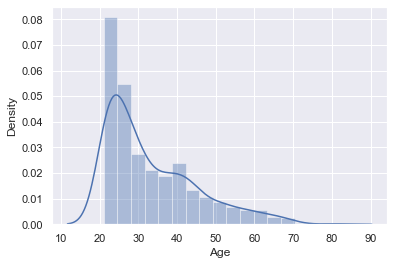

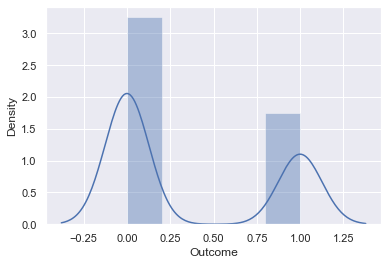

In [24]:
def dist(i):
    sns.distplot(df[i])
    plt.show()
    
for i in df.columns:
    dist(i)

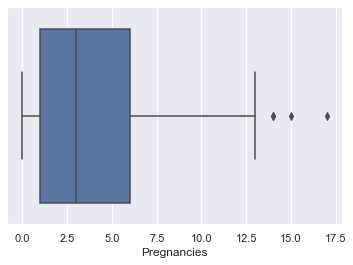

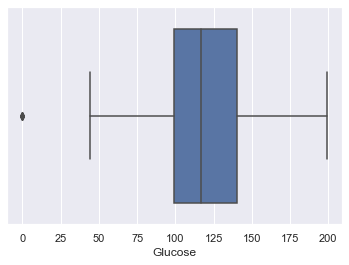

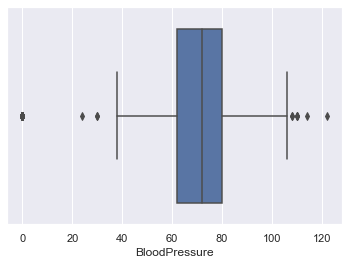

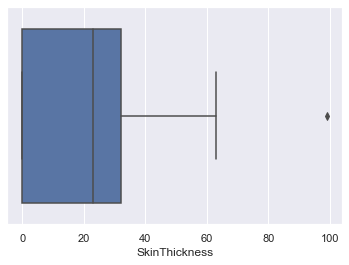

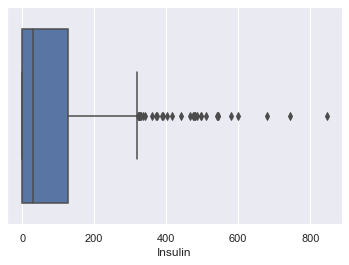

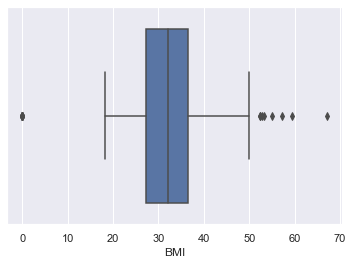

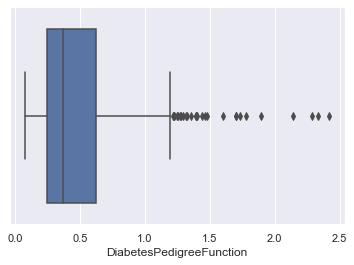

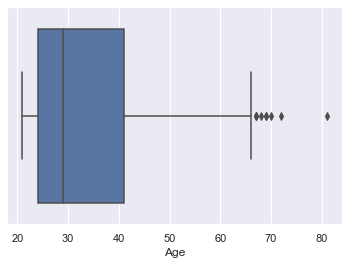

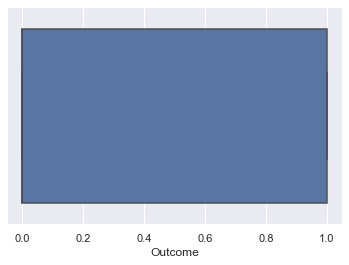

In [25]:
def box(i):
    sns.boxplot(df[i])
    plt.show()
    
for i in df.columns:
    box(i)

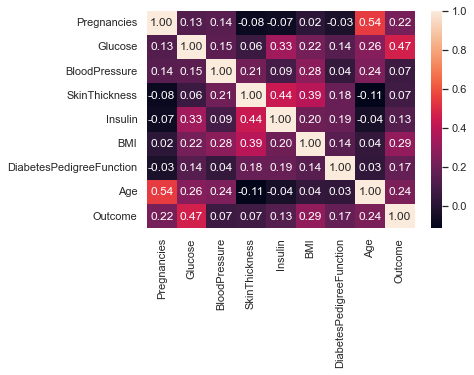

In [26]:
sns.heatmap(df.corr(),annot=True,fmt='0.02f')
plt.show()

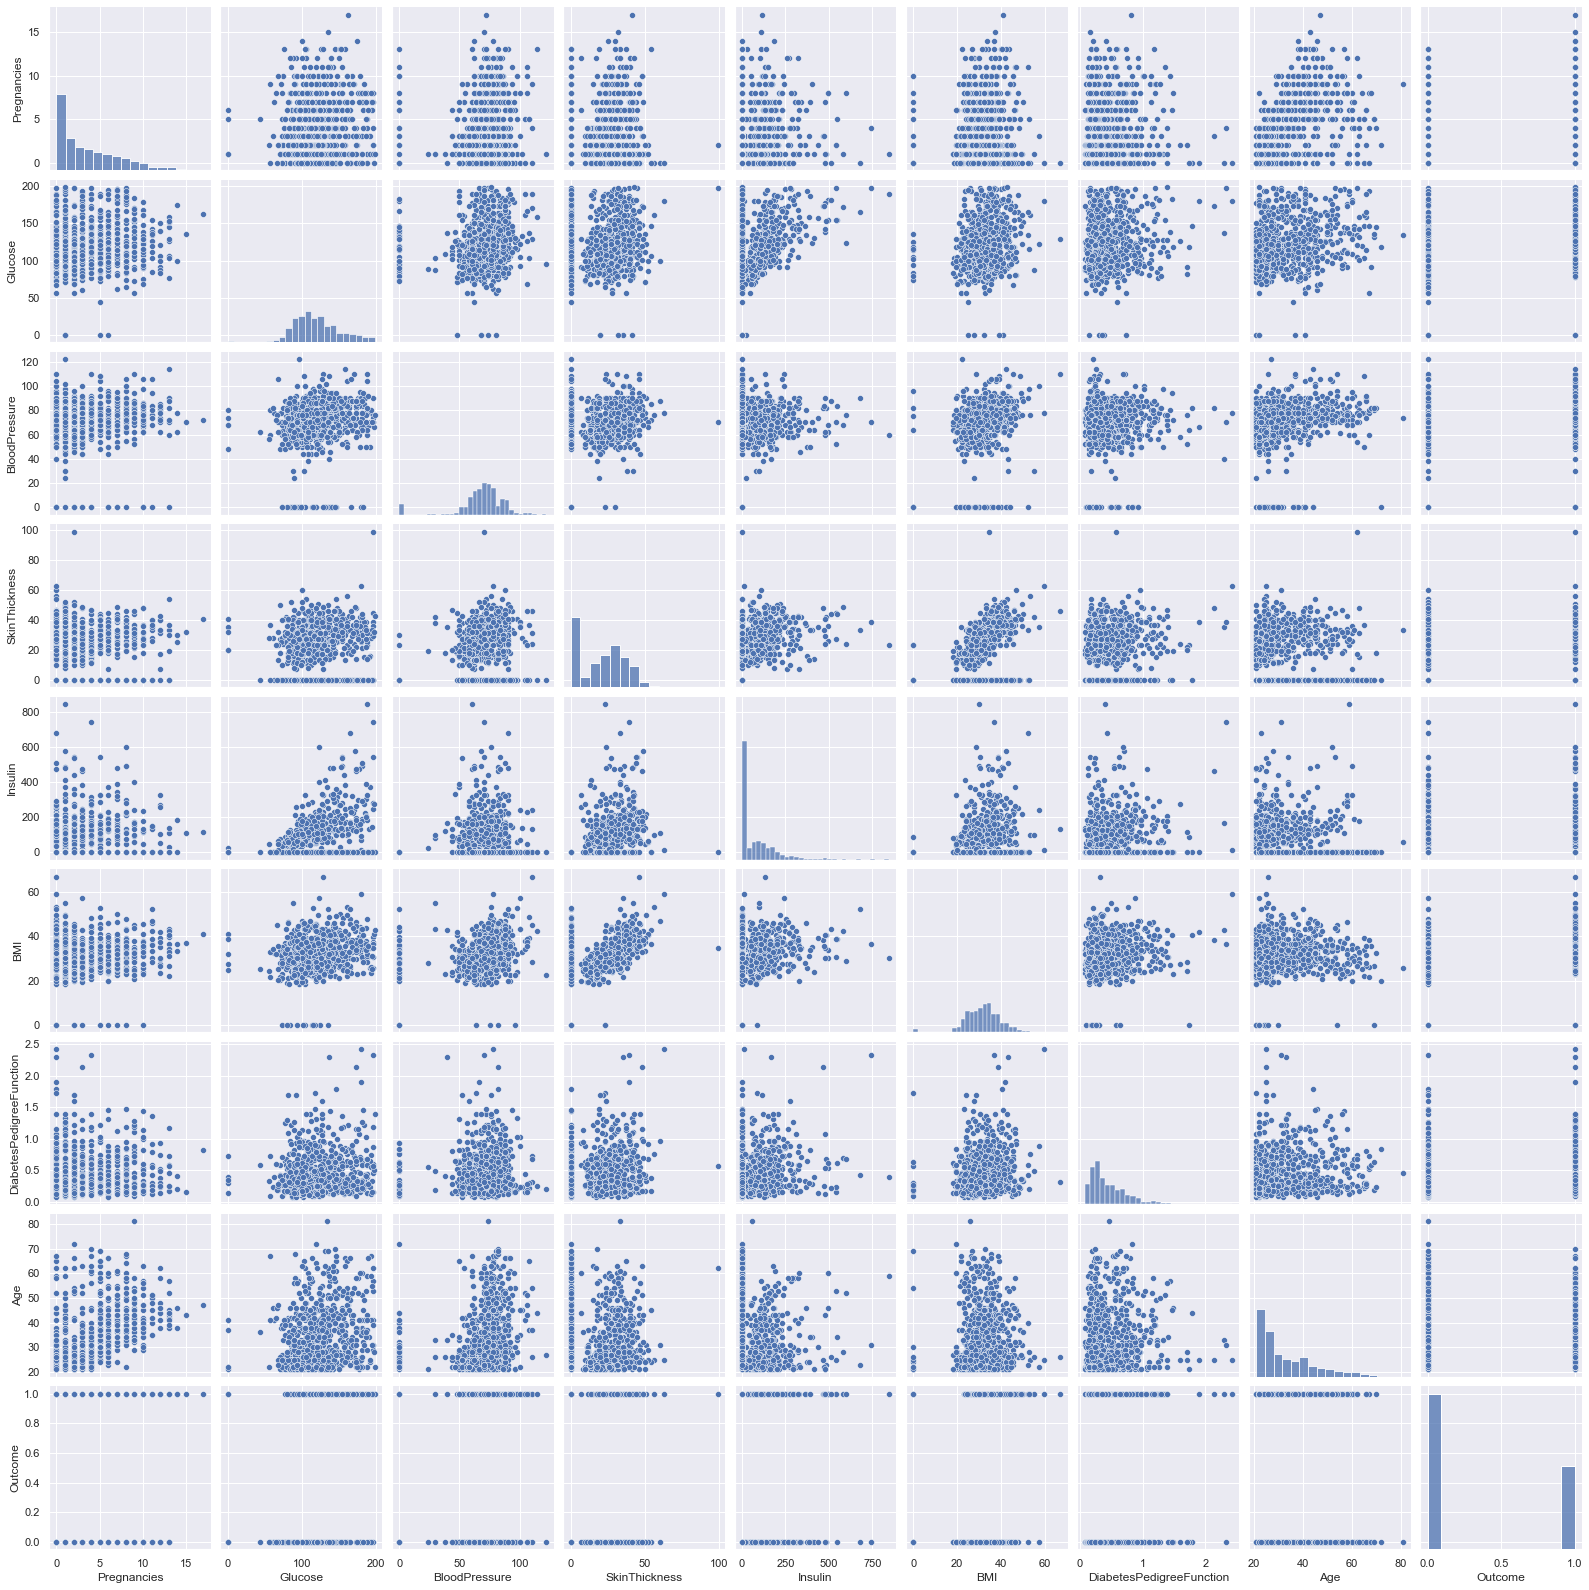

In [41]:
sns.pairplot(df)
plt.show()

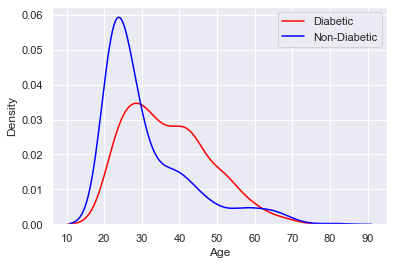

In [19]:
sns.distplot(df['Age'][df['Outcome']==1],hist=False,color='red',label='Diabetic')
sns.distplot(df['Age'][df['Outcome']==0],hist=False,color='blue',label='Non-Diabetic')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Pregnancies'>

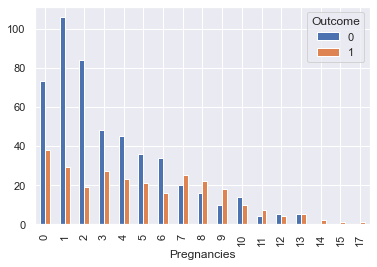

In [20]:
pd.crosstab(df['Pregnancies'],df['Outcome']).plot(kind='bar')

In [27]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

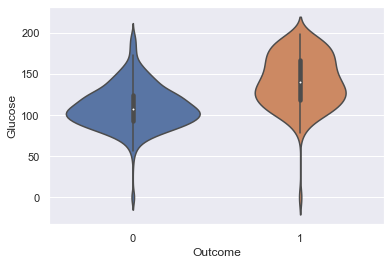

In [35]:
sns.violinplot(df['Outcome'],df['Glucose'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

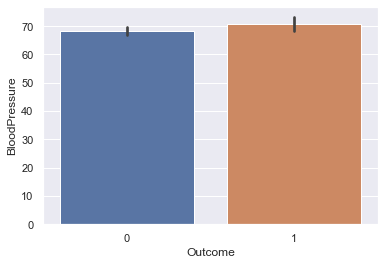

In [40]:
sns.barplot(df['Outcome'],df['BloodPressure'])

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

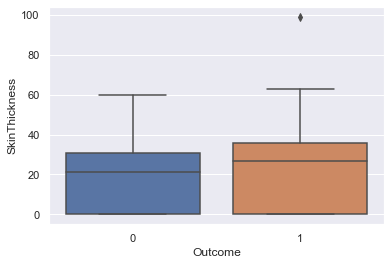

In [45]:
sns.boxplot(df['Outcome'],df['SkinThickness'])
# sns.distplot(df['Outcome'],df['SkinThickness'],hist=False)

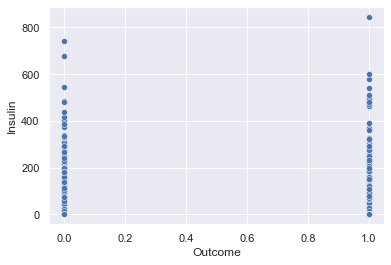

In [51]:
sns.scatterplot(df['Outcome'],df['Insulin'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

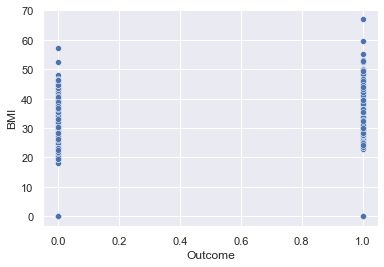

In [57]:
sns.scatterplot(df['Outcome'],df['BMI'])

In [68]:
df['DiabetesPedigreeFunction'].nunique()

517

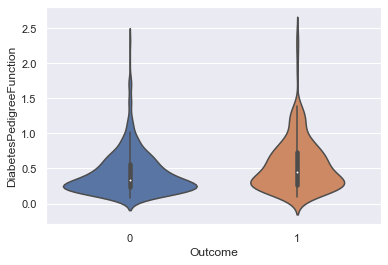

In [72]:
sns.violinplot(df['Outcome'],df['DiabetesPedigreeFunction'])
plt.show()

## Observations: 

1. No outliers
2. Highly correlated features are not there. 
3. All the features are normally distributed. 
4. Age could be a factor which impacts the diabetic condition. 
5. Looks like, more number of pregnancy can lead to daibetic condition. 
6. People with diabetic condition, have a higher glucose level. 
7. Blood Pressure doesn't give any proper insight to the diabetic condition
8. 'SkinThickness' may be impacted by the daibetic condition. As we see the median is also higer and towards the max range.
9. People with daibetes have higher insulin
10. People with diabetes have higher BMI
11.df['DiabetesPedigreeFunction'] not much insight from this feature


# EDA COMPLETES

## SPliting The data

In [111]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [112]:
x= df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [113]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [114]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Spliting into training and testing datasets.

In [115]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 8) (614,) (154, 8) (154,)


# Model Building and Evaluation

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

In [132]:
models = {'Logistic Regression': LogisticRegression(),
         'Decision Tree': DecisionTreeClassifier(criterion='gini'),
         'Random Forest': RandomForestClassifier(criterion='gini',n_estimators=200),
         'Naive Bayes': GaussianNB(),
#          'KNearestNeighbors':KNeighborsClassifier(),
          'SVM':SVC(),
         'AdaBoost':AdaBoostClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         'XGBoost':XGBClassifier()}


************ Logistic Regression *************

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       401
           1       0.74      0.58      0.65       213

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

Accuracy_Score - Train for  Logistic Regression  is - 0.7833876221498371
Accuracy_Score - Test for  Logistic Regression  is - 0.7792207792207793
Roc AUC SCORE -  0.7351164342664467
Roc AUC SCORE -  0.7313131313131312


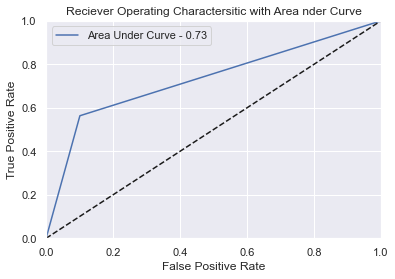

_______________________________________________________________________________


************ Decision Tree *************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        99
           1       0.53      0.53      0.53        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154

Accuracy_Score - Train for  Decision Tree  is - 1.0
Accuracy_Score - Test for  Decision Tree  is - 0.6623376623376623
_______________________________________________________________________________


************ Random Fo

In [146]:
for name,func in models.items():
    print("\n************",name,"*************\n")
    nm = func
    nm.fit(x_train,y_train)
    y_pred_train=nm.predict(x_train)
    y_pred_test=nm.predict(x_test)
#     Evaluation Starts
    confusion_matrix(y_train,y_pred_train)
    confusion_matrix(y_test,y_pred_test)
    print(classification_report(y_train,y_pred_train))
    print(classification_report(y_test,y_pred_test))
    print(f'Accuracy_Score - Train for ', name, ' is -',accuracy_score(y_train,y_pred_train))
    print(f'Accuracy_Score - Test for ', name, ' is -',accuracy_score(y_test,y_pred_test))
    
    if name == 'Logistic Regression':
        print("Roc AUC SCORE - ",roc_auc_score(y_train,y_pred_train))
        print("Roc AUC SCORE - ",roc_auc_score(y_test,y_pred_test))
        fpr,tpr,threshold = roc_curve(y_test,y_pred_test)
        plt.plot(fpr,tpr,label='Area Under Curve - %0.2f'%roc_auc_score(y_test,y_pred_test))
        plt.plot([0,1],[0,1],'k--')
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Reciever Operating Charactersitic with Area nder Curve")
        plt.legend()
        plt.show()
    
    print("_______________________________________________________________________________\n")

In [134]:
error_rate = []

for i in range(2,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test != y_pred))

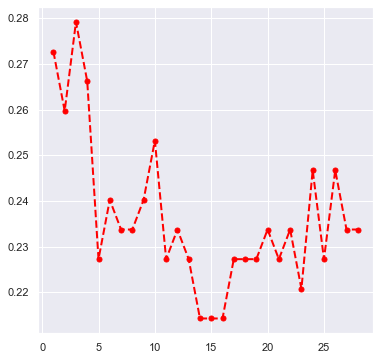

In [136]:
plt.figure(figsize=(6,6))
plt.plot(range(1,29),error_rate,color='red',marker='o',linestyle='dashed',linewidth=2, markersize=5)

In [138]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_test = knn.predict(x_test)
#     Evaluation Starts
confusion_matrix(y_train,y_pred_train)
confusion_matrix(y_test,y_pred_test)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))
print(f'Accuracy_Score - Train for knn is -',accuracy_score(y_train,y_pred_train))
print(f'Accuracy_Score - Test for knn is -',accuracy_score(y_test,y_pred_test))
print("_______________________________________________________________________________\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy_Score - Train for knn is - 1.0
Accuracy_Score - Test for knn is - 0.7532467532467533
_______________________________________________________________________________



# Insight 

GradientBoost is the best model here...
All the other models have very high training accuracy and lower testing accuracy. 

This may be tensing to bias. 

We will do ridge and lasso to check the overfitting issue also. 

Nevertheless, Gradient Boost gives good model and can be use. 

In [139]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [140]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train,y_train)
y_pred_r = ridge.predict(x_test)
y_pred_r = np.where(y_pred_r>0.5,1,0)
print("Accuracy Score",accuracy_score(y_test,y_pred_r))

Accuracy Score 0.7792207792207793


In [141]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_pred_l = lasso.predict(x_test)
y_pred_l = np.where(y_pred_l>0.5,1,0)
print("Accuracy Score",accuracy_score(y_test,y_pred_l))

Accuracy Score 0.7792207792207793


In [142]:
en = ElasticNet(alpha=0.01)
en.fit(x_train,y_train)
y_pred_en = en.predict(x_test)
y_pred_en = np.where(y_pred_en>0.5,1,0)
print("Accuracy Score",accuracy_score(y_test,y_pred_en))

Accuracy Score 0.7727272727272727


### Final Insight
All the scores indicate that there should not be any overfitting issues also. 
We can use gradient Descent as the final model.

## Done